In [3]:
!pip install pycaret

In [1]:
import numpy as np 
import pandas as pd 

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sub   = pd.read_csv('sub.csv')

In [4]:
from pycaret.classification import *

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8751
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.833000,0.868000,0.736800,0.815700,0.770900,0.640400
1,CatBoost Classifier,0.826500,0.872400,0.723900,0.808500,0.762000,0.626400
2,Random Forest Classifier,0.818600,0.859700,0.698700,0.807800,0.747300,0.607000
3,Extreme Gradient Boosting,0.816900,0.869800,0.698900,0.804400,0.744800,0.603600
4,Gradient Boosting Classifier,0.815200,0.867700,0.694400,0.801200,0.741300,0.599100
5,Logistic Regression,0.802400,0.864600,0.702700,0.767800,0.731200,0.575800
6,Extra Trees Classifier,0.801000,0.844100,0.723700,0.755100,0.736400,0.576800
7,Ridge Classifier,0.799300,0.000000,0.694600,0.766400,0.725400,0.568300
8,Ada Boost Classifier,0.794400,0.849400,0.748900,0.727200,0.736100,0.568100
9,Linear Discriminant Analysis,0.794400,0.863700,0.690400,0.759400,0.719200,0.558300


In [13]:
lgbm  = create_model('lightgbm') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.8932,0.8333,0.7692,0.8000,0.6688
1,0.8730,0.9247,0.8333,0.8333,0.8333,0.7308
2,0.8254,0.8697,0.6250,0.8824,0.7317,0.6078
3,0.8065,0.8399,0.6667,0.8000,0.7273,0.5792
4,0.8710,0.8805,0.7083,0.9444,0.8095,0.7149
5,0.8065,0.8690,0.7083,0.7727,0.7391,0.5857
6,0.7742,0.7368,0.6250,0.7500,0.6818,0.5090
7,0.8065,0.8914,0.7500,0.7500,0.7500,0.5921
8,0.8387,0.9013,0.7917,0.7917,0.7917,0.6601
9,0.8871,0.8740,0.8261,0.8636,0.8444,0.7559


In [14]:
tuned_lightgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8254,0.8894,0.7917,0.7600,0.7755,0.6328
1,0.8571,0.9193,0.8333,0.8000,0.8163,0.6995
2,0.7619,0.8681,0.7083,0.6800,0.6939,0.4992
3,0.8065,0.8701,0.6250,0.8333,0.7143,0.5724
4,0.8387,0.8268,0.7083,0.8500,0.7727,0.6493
5,0.8065,0.8706,0.7083,0.7727,0.7391,0.5857
6,0.7581,0.7675,0.6250,0.7143,0.6667,0.4781
7,0.8226,0.8958,0.7083,0.8095,0.7556,0.6173
8,0.8065,0.9041,0.7500,0.7500,0.7500,0.5921
9,0.8387,0.8718,0.6957,0.8421,0.7619,0.6416


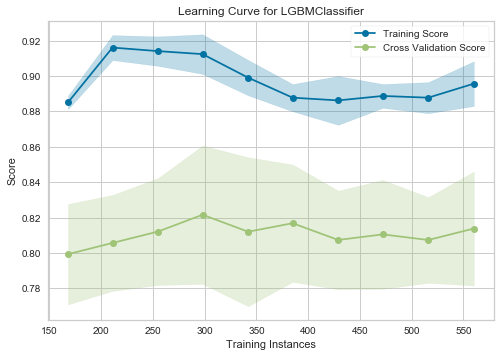

In [15]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

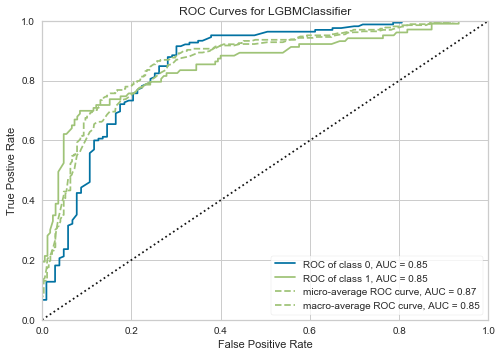

In [16]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

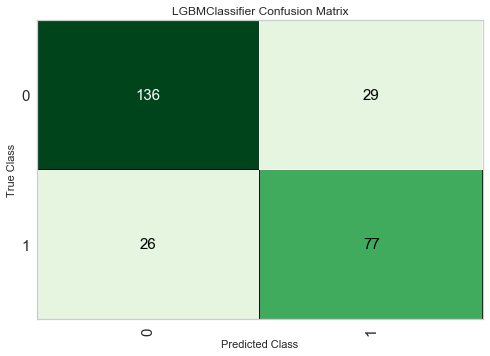

In [17]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

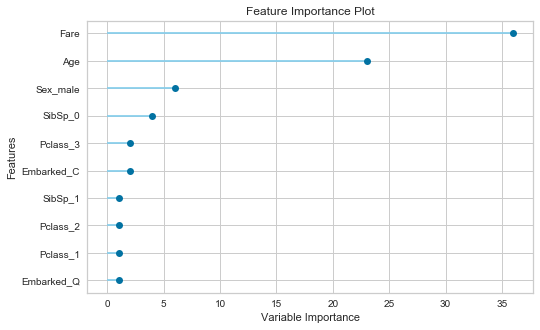

In [18]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

In [19]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

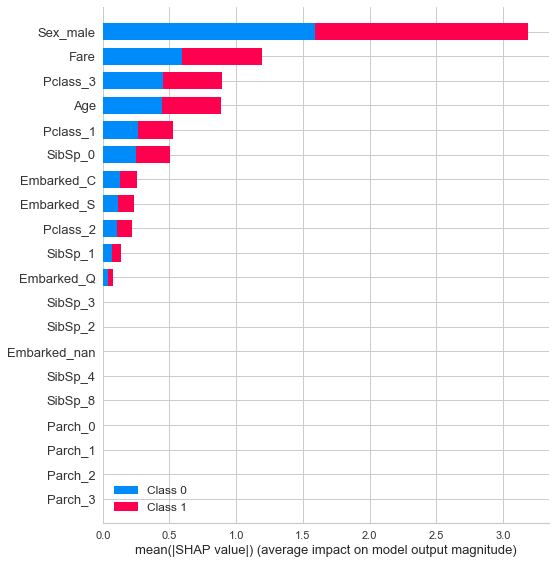

In [20]:
interpret_model(tuned_lightgbm)

In [21]:
predict_model(tuned_lightgbm, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0309
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.0903
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0602
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0301
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.1853
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.1054
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9887
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0089
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.1054


In [22]:
predictions = predict_model(tuned_lightgbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0309
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.0903
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0602
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0301
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.1853


In [23]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [24]:
logr  = create_model('lr');      
xgb   = create_model('xgboost');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_lightgbm,logr,xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.0,0.7917,0.7917,0.7917,0.6635
1,0.8571,0.0,0.8333,0.8000,0.8163,0.6995
2,0.8413,0.0,0.7083,0.8500,0.7727,0.6523
3,0.8387,0.0,0.7083,0.8500,0.7727,0.6493
4,0.8387,0.0,0.6667,0.8889,0.7619,0.6437
5,0.8387,0.0,0.7500,0.8182,0.7826,0.6548
6,0.7581,0.0,0.6667,0.6957,0.6809,0.4862
7,0.8226,0.0,0.7083,0.8095,0.7556,0.6173
8,0.8065,0.0,0.7500,0.7500,0.7500,0.5921
9,0.8226,0.0,0.6957,0.8000,0.7442,0.6094
